In [1]:
import numpy as np
import scipy
from scipy.integrate import ode
import networkx as nx

In [2]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Single Oscillator

External force $F(t)$

"Perceived happiness" $x$: 
$$\frac{d^2x}{dt^2} = -a x - b v + F(t)$$

"Actual happiness" $v$:
$$v = \frac{dx}{dt}$$

In [3]:
#damped oscillator equation
def oscillator(t, y, F):
    b = 1
    a = .25
    x = y[0]
    v = y[1]

    dxdt = v
    Ft = F(t)
    dvdt = -a*x -b*v + Ft
    
    f = [dxdt, dvdt]
    return(f)
    

In [4]:
t0 = 0
y0 = [0,0]
t1 = 20
dt = .1

#Forcing equation
F = lambda x: 1 if x < 1 else np.cos(2*np.pi*x) if (x > 10 and x < 15) else 0


r = ode(oscillator)
r.set_initial_value(y0, t0).set_f_params(F)

t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

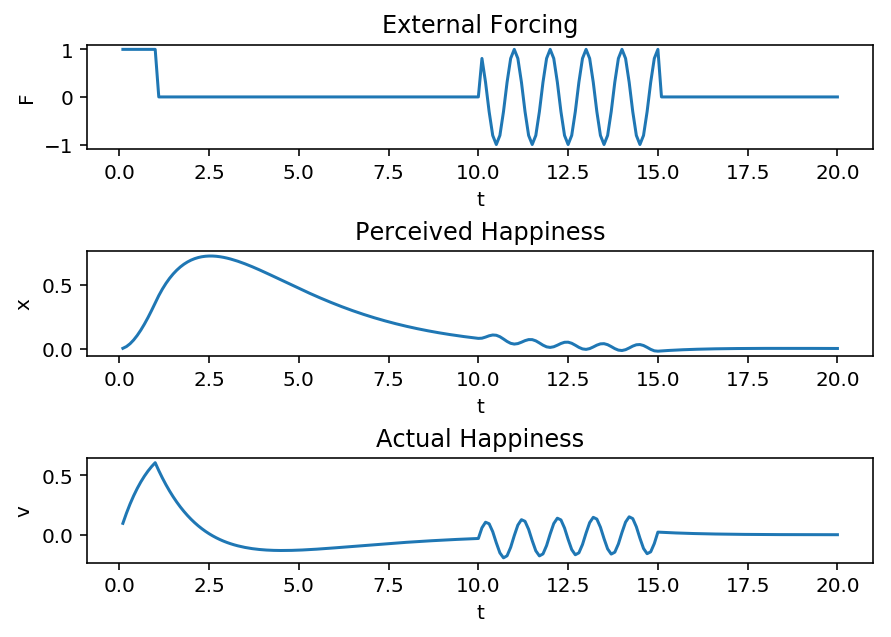

In [5]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, y[:,0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, y[:,1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')

plt.show()

# Multiple Oscillators

## (Linear interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r\mathbf{x} + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [6]:
#damped oscillator equation
def network_lin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, x) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [7]:
N = 2

t0 = 0
y0 = np.array([[0,1],[0,-1]])
t1 = 100
dt = .1

#Weights
Wr = np.ones((N,N))
np.fill_diagonal(Wr, 0)

Wi = [1,-1]

#Forcing
F = lambda x: 0 if x < 15 else 1 #np.cos(x)

r = ode(network_lin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [8]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

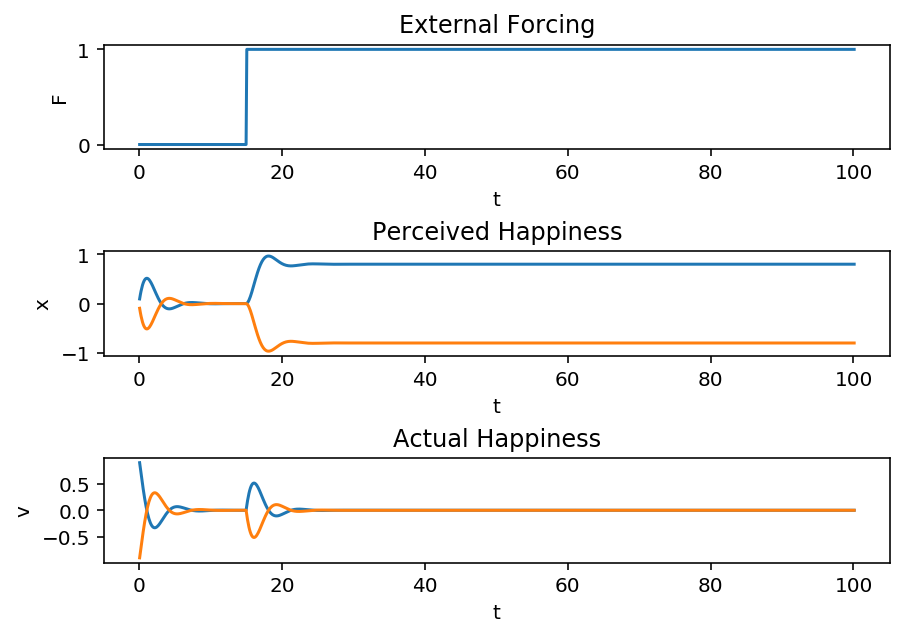

In [9]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')


## (Tanh interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r tanh(\mathbf{x}) + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [10]:
#damped oscillator equation
def network_nonlin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, np.tanh(x)) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [11]:
N = 2

t0 = 0
y0 = np.array([[0,1],[0,-1]])
t1 = 100
dt = .1

#Weights
Wr = np.ones((N,N))
np.fill_diagonal(Wr, 0)

Wi = [1,-1]

#Forcing
F = lambda x: 0 if x < 15 else 1 #np.cos(x)

r = ode(network_nonlin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [12]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

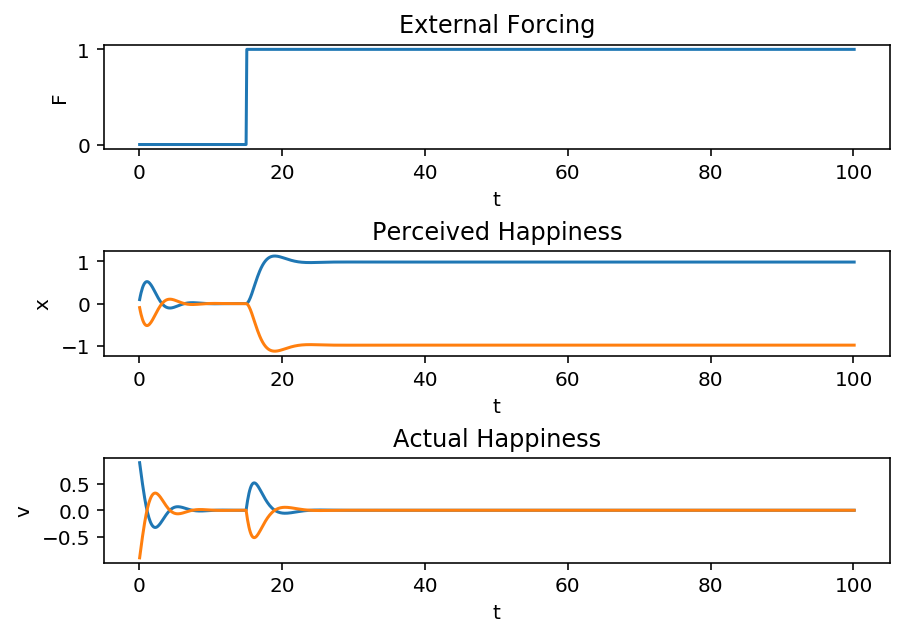

In [13]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)


axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')


# Bigger network

## (Linear interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r \mathbf{x} + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [14]:
#damped oscillator equation
def network_lin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, x) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [15]:
N = 100

t0 = 0
y0 = np.ones((N, 2))
y0[:,1] = 1
t1 = 3
dt = .1

#Weights
Wr = np.random.randn(N,N)
np.fill_diagonal(Wr, 0)

Wi = np.random.randn(N)

#Forcing
F = lambda x: 0 

r = ode(network_lin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [16]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

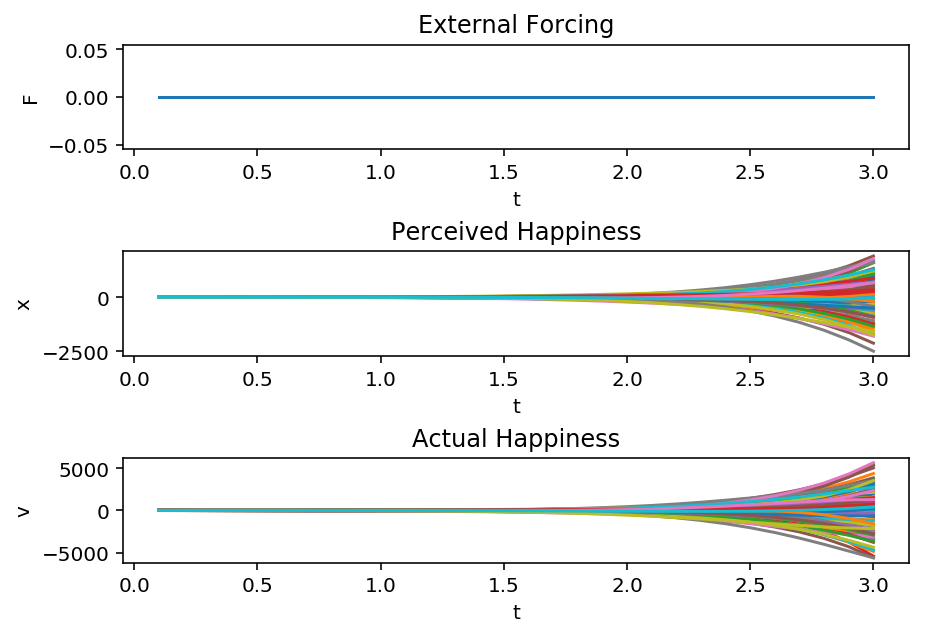

In [17]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')


## (Tanh interactions)

$$\mathbf{v} = \frac{d\mathbf{x}}{dt}$$
$$\frac{d\mathbf{v}}{dt} = -a\mathbf{x} -b\mathbf{v} + W_r tanh(\mathbf{x}) + W_I F(t)$$

$W_r$ is recurrent weight matrix, diagonal set to zero

$W_I$ is external force weight vector

In [18]:
#damped oscillator equation
def network_nonlin(t, y, Wr, Wi, F):
    
    n = int(len(y) / 2)
    b = 1
    a = .25
    x = y[:n]
    v = y[n:]
    
    dxdt = v
    dvdt = -a*x -b*v + np.dot(Wr, np.tanh(x)) + np.dot(Wi, F(t))
    
    f = np.array([dxdt, dvdt]).reshape(2*n)
    return(f)

In [19]:
N = 100

t0 = 0
y0 = np.random.randn(N, 2)
t1 = 100
dt = .1

#Weights
Wr = np.random.randn(N,N)
np.fill_diagonal(Wr, 0)

Wi = np.random.randn(N)

#Forcing
F = lambda x: 0 #np.cos(x)

r = ode(network_nonlin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [20]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

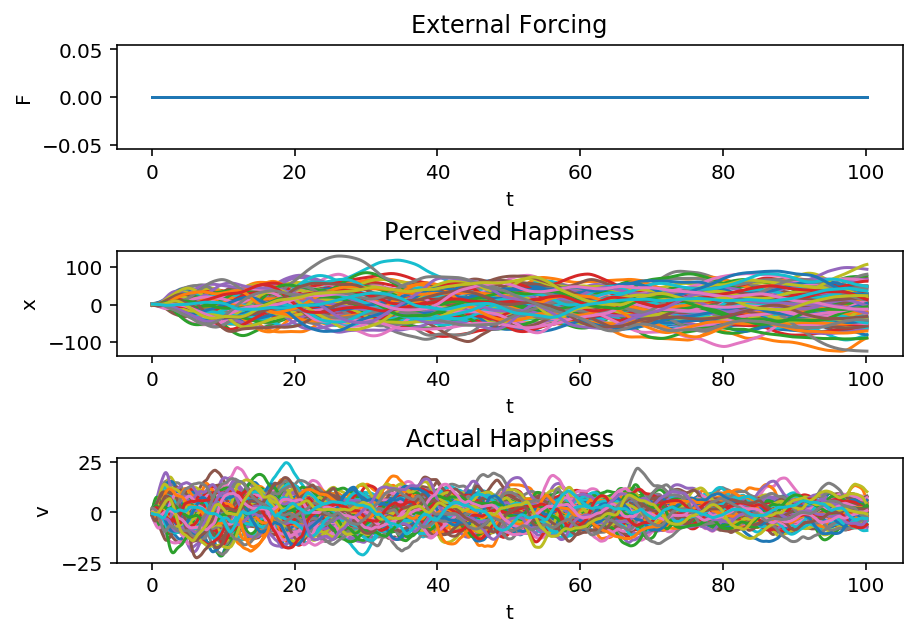

In [21]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')
    
    

## Network structures

### Sparse random

In [22]:
N = 100

t0 = 0
y0 = np.random.randn(N, 2)
t1 = 100
dt = .1

#Asymmetric weights
Wr = scipy.sparse.random(N,N, .03, data_rvs=np.random.randn).A
np.fill_diagonal(Wr, 0)

Wi = np.random.randn(N)

#Forcing
F = lambda x: 0 #np.cos(x/np.pi)

r = ode(network_nonlin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [23]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

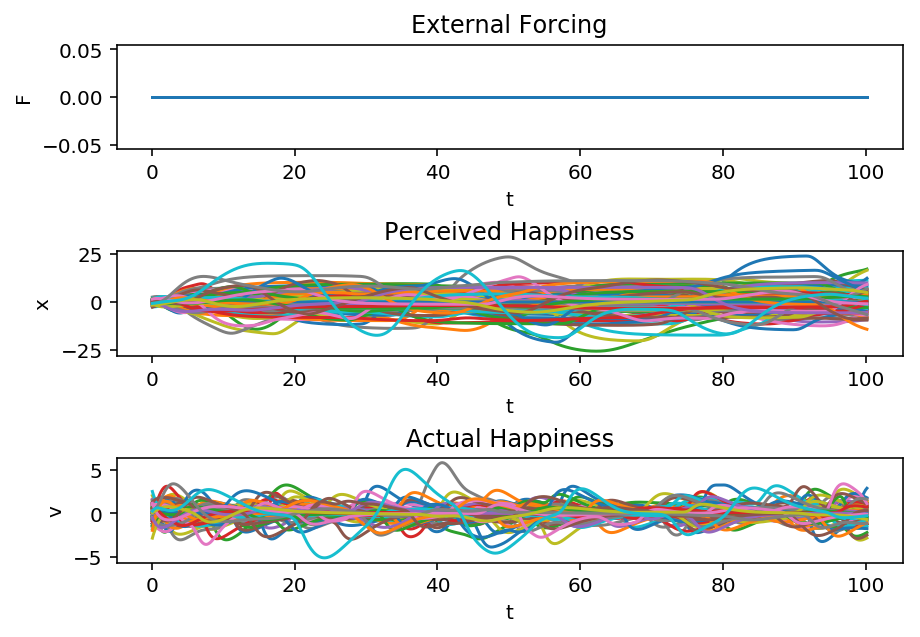

In [24]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')
    
    

In [25]:
G=nx.from_numpy_matrix(Wr)
pos=nx.spring_layout(G, iterations = 1000, weight=None)

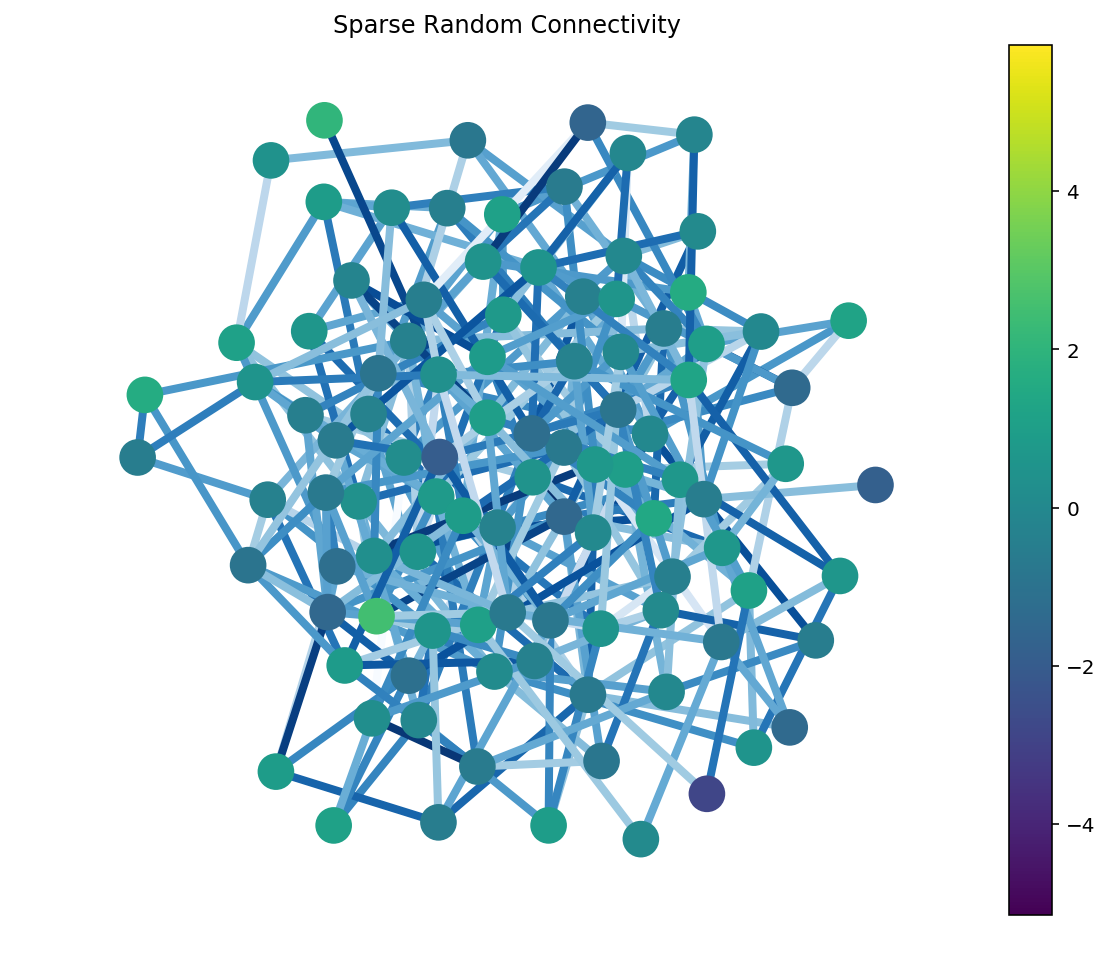

In [26]:
data = ytild[:,:,1] #0 for perceived, 1 for actual

edge_colors = [g[2]["weight"] for g in G.edges(data=True)]
edge_cmap=plt.cm.Blues

node_colors = data[0]
node_cmap = plt.cm.viridis
vmin = np.min(data)
vmax = np.max(data)
norm=plt.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10,8))


nodes = nx.draw_networkx_nodes(
        G,pos,                        
        node_color=node_colors, node_cmap=node_cmap
    )

nx.draw_networkx_edges(
    G,pos,
    edge_color=edge_colors,width=4,edge_cmap=edge_cmap
)
plt.axis('off')

sm = plt.cm.ScalarMappable(cmap=node_cmap, norm=norm)
sm._A = []
plt.colorbar(sm)
plt.title("Sparse Random Connectivity")

def update(i):
    node_colors = node_cmap(norm(data[i]))
    nodes.set_color(node_colors)
    
anim = animation.FuncAnimation(fig, update, frames = range(0, len(data), 2), interval=15)

anim

###  Dorogovtsev Goltsev Mendes

In [59]:
#Weights
G=nx.dorogovtsev_goltsev_mendes_graph(5)
Wr = nx.adjacency_matrix(G).A.astype(float)

#Asymmetric weights
import itertools
for i,j in itertools.product(np.arange(len(Wr)), np.arange(len(Wr))):
    if Wr[i,j] != 0:
        Wr[i,j] = np.random.normal(1)**2
np.fill_diagonal(Wr, 0)
G=nx.from_numpy_matrix(Wr)

N = Wr.shape[0]
t0 = 0
y0 = np.random.randn(N, 2)
t1 = 100
dt = .1

Wi = np.random.randn(N)

#Forcing
F = lambda x: 0

r = ode(network_nonlin)
r.set_initial_value(y0.T.reshape(2*N), t0).set_f_params(Wr, Wi, F)


t = []
y = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    t.append(r.t)
    y.append(r.y)
y = np.array(y)

In [60]:
ytild = y.reshape(-1, 2, N).transpose(0,2,1)

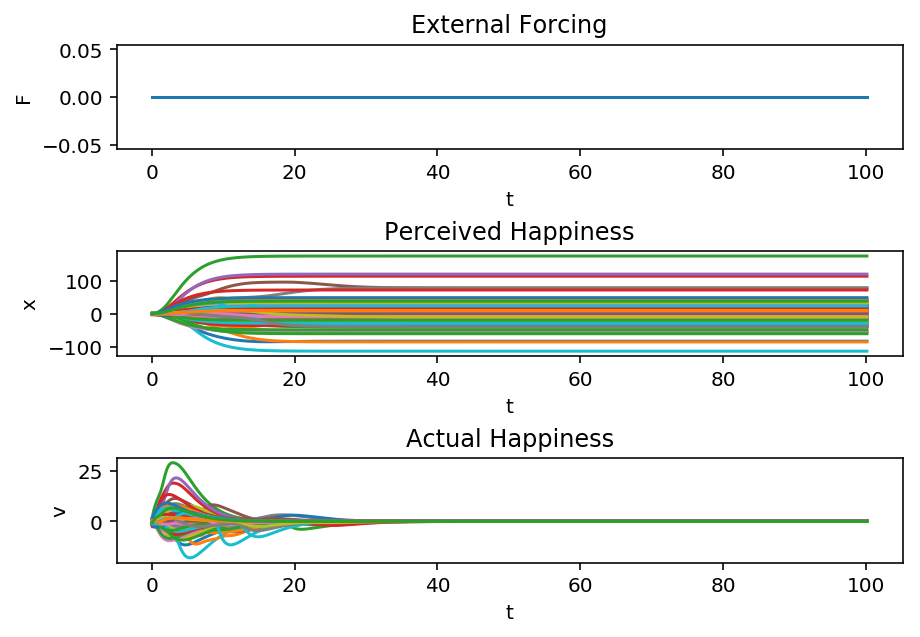

In [61]:
fig, axes = plt.subplots(3, 1)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

axes[0].plot(t, [F(ti) for ti in t])
axes[0].set_title('External Forcing')
axes[0].set_ylabel('F')
axes[0].set_xlabel('t')

axes[1].plot(t, ytild[:, :, 0])
axes[1].set_title('Perceived Happiness')
axes[1].set_ylabel('x')
axes[1].set_xlabel('t')

axes[2].plot(t, ytild[:, :, 1])
axes[2].set_title('Actual Happiness')
axes[2].set_ylabel('v')
axes[2].set_xlabel('t')

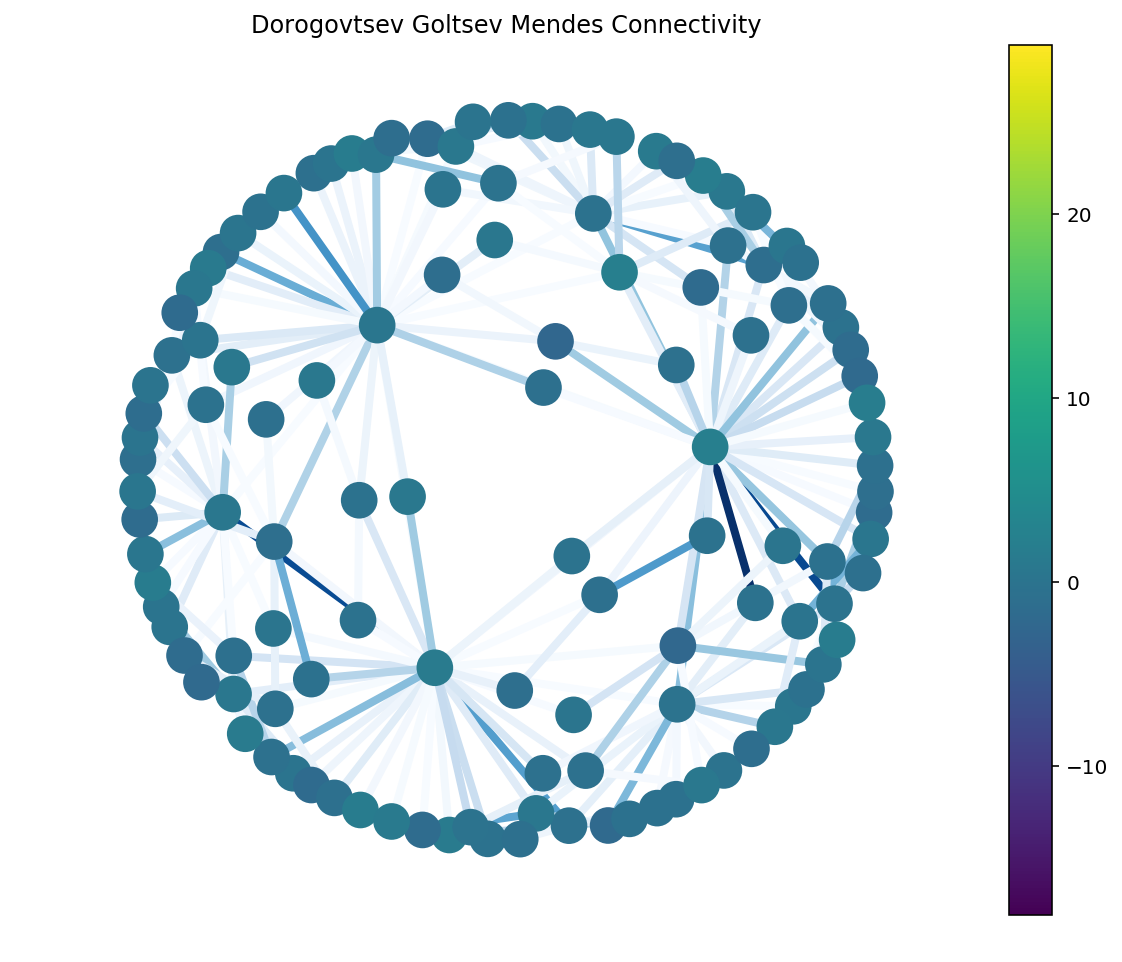

In [62]:
pos=nx.spring_layout(G, iterations = 1000, weight=None)
data = ytild[:,:,1] #0 for perceived, 1 for actual

edge_colors = [g[2]["weight"] for g in G.edges(data=True)]
edge_cmap=plt.cm.Blues

node_colors = data[0]
node_cmap = plt.cm.viridis
vmin = np.min(data)
vmax = np.max(data)
norm=plt.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10,8))


nodes = nx.draw_networkx_nodes(
        G,pos,                        
        node_color=node_colors, node_cmap=node_cmap
    )

nx.draw_networkx_edges(
    G,pos,
    edge_color=edge_colors,width=4,edge_cmap=edge_cmap
)
plt.axis('off')

sm = plt.cm.ScalarMappable(cmap=node_cmap, norm=norm)
sm._A = []
plt.colorbar(sm)
plt.title("Dorogovtsev Goltsev Mendes Connectivity")

def update(i):
    node_colors = node_cmap(norm(data[i]))
    nodes.set_color(node_colors)
    
anim = animation.FuncAnimation(fig, update, frames = range(0, len(data), 2), interval=15)

anim